In [1]:
import math
from matplotlib import pyplot

In [2]:
t = [k / 3 for k in range(3)]
x = [5.5, 8.5, 10.5, 13, 17, 20.5, 24.5, 28, 32.5, 37.5, 40.5, 42.5, 45, 47,
      49.5, 50.5, 51, 51.5, 52.5, 53, 52.8, 52, 51.5, 53, 54, 55, 56,
      55.5, 54.5, 54, 55, 57, 58.5, 59, 61.5, 62.5, 63.5, 63, 61.5,
      59, 55, 53.5, 52.5, 50.5, 49.5, 50, 51, 50.5, 49, 47.5, 46, 45.5, 45.5,
      45.5, 46, 47.5, 47.5, 46, 43, 41, 41.5, 41.5, 41, 39.5, 37.5, 34.5,
      31.5, 28, 24, 21, 18.5, 17.5, 16.5, 15, 13, 10, 8, 6, 6, 6, 5.5,
      3.5, 1, 0, 0, 0.5, 1.5, 3.5, 5, 5, 4.5, 4.5, 5.5, 6.5, 6.5, 5.5]
y = [41, 40.5, 40, 40.5, 41.5, 41.5, 42, 42.5, 43.5, 45, 47, 49.5, 53, 57, 59,
      59.5, 61.5, 63, 64, 64.5, 63, 61.5, 60.5, 61, 62, 63, 62.5, 61.5, 60.5,
      60, 59.5, 59, 58.5, 57.5, 55.5, 54, 53, 51.5, 50, 50, 50.5, 51, 50.5,
      47.5, 44, 40.5, 36, 30.5, 28, 25.5, 21.5, 18, 14.5, 10.5, 7.50, 4,
      2.50, 1.50, 2, 3.50, 7, 12.5, 17.5, 22.5, 25, 25, 25, 25.5, 26.5,
      27.5, 27.5, 26.5, 23.5, 21, 19, 17, 14.5, 11.5, 8, 4, 1, 0, 0.5, 3,
      6.50, 10, 13, 16.5, 20.5, 25.5, 29, 33, 35, 36.5, 39, 41]
# x = [-2, 0, 2]
# y = [4, 0, 4]

In [3]:
def dividedDifferences(x, y):
    differences = y
    n = len(x) - 1
    for i in range(1, n+1):
        for j in range(n, i-1, -1):
            differences[j] = (differences[j] - differences[j-1]) / (x[j] - x[j-i])
    return differences[-1]

In [4]:
def h_k(x, k):
    return x[k] - x[k-1]

In [5]:
def getAuxiliaryCoefficients(x, y, n):
    q = [0] * n
    p = [0] * n
    u = [0] * n
    d = [0] * n

    def getLambda(k):
        lambda_k = h_k(x, k) / (h_k(x, k) + h_k(x, k+1))
        return lambda_k

    for k in range(1, n):
        lambda_k = getLambda(k)
        d[k] = 6 * dividedDifferences(x[k - 1 : k + 2], y[k - 1 : k + 2])
        p[k] = lambda_k * q[k-1] + 2
        q[k] = (lambda_k - 1) / p[k]
        u[k] = (d[k] - lambda_k * u[k-1]) / p[k]

    return (p, q, u)

In [6]:
def getM(x, y, n):
    M = [0] * (n + 1)

    p, q, u = getAuxiliaryCoefficients(x, y, n)

    M[n-1] = u[n-1]

    for k in range(n-2, 0, -1):
        M[k] = u[k] + q[k] * M[k+1]

    return M

In [7]:
def spline(x, y):
    n = len(x) - 1
    M = getM(x, y, n)

    def s(t):

        k = 1
        for i in range(n):
            if t >= x[i] and t <= x[i+1]:
                k = i+1
                h = h_k(x, k)
                # print(1/h)
                # print(1/6 * M[k-1] * pow((x[k] - t), 3))
                # print(1/6 * M[k] * pow((t - x[k-1]), 3))
                # print((y[k-1] - 1/6 * M[k-1] * h**2))
                # print((x[k] - t) + (y[k] - 1/6 * M[k] * h**2) * (t - x[k]))
                return 1/h * (1/6 * M[k-1] * pow((x[k] - t), 3) + 1/6 * M[k] * pow((t - x[k-1]), 3) + (y[k-1] - 1/6 * M[k-1] * h**2) * (x[k] - t) + (y[k] - 1/6 * M[k] * h**2) * (t - x[k]))

    return s

In [8]:
def map_list(f, x):
    return list(map(f, x))

In [9]:
S_x = spline(t, x)
S_y = spline(x, y)

ZeroDivisionError: float division by zero

In [20]:
n = 1000

u_k = [k/n for k in range(0, n+1)]

pos_x = map_list(S_x, u_k)
pos_x = u_k
pos_y = map_list(S_y, x)

NameError: name 'S_y' is not defined

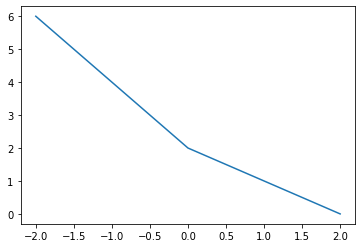

In [33]:
pyplot.plot(x,pos_y);